# **ML Project - Bank Marketing Prediction**



In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_excel(r'bank-marketing.xlsx')
df.head(10)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,100000,married,tertiary,yes,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,100000,single,tertiary,no,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,120000,divorced,tertiary,no,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,55000,married,primary,yes,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,60000,single,secondary,yes,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [39]:
df.shape

(45211, 19)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [41]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [42]:
cols = df.columns.to_list()
num_cols= df._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns:')
print(num_cols)
print('\nCategorical Columns:')
print(cat_cols)

Numerical Columns:
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical Columns:
['poutcome', 'education', 'default', 'response', 'month', 'contact', 'housing', 'targeted', 'job', 'loan', 'marital']


In [43]:
df[df.duplicated()].value_counts() 

Series([], dtype: int64)

In [44]:
# numerical summary
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 2 . Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [45]:
print('Mean is',df['pdays'].mean())
print('Median is',df['pdays'].median())
print('Minimum values ',df['pdays'].min())

Mean is 40.19782796222158
Median is -1.0
Minimum values  -1


- From above we can see that there is huge difference between mean and median.

In [46]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [47]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

So, if pdays = -1, it indicates that this person was not previosly contacted so, we will drop these records because we want to study on people who was involved in the campaign

In [48]:
df.shape

(45211, 19)

## 3. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [49]:
df = df.drop(df[df.pdays==-1].index)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [50]:
df.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [51]:
print('Mean is',df['pdays'].mean())
print('Median is',df['pdays'].median())
print('Minimum values ',df['pdays'].min())

Mean is 224.57769165556496
Median is 194.0
Minimum values  1


Now that we have limit ourselves to the relevant values only the mean and median looks better.

## 4. Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [52]:
df.groupby(['education'])['balance'].agg(np.median)

education
primary      520
secondary    527
tertiary     775
unknown      782
Name: balance, dtype: int64

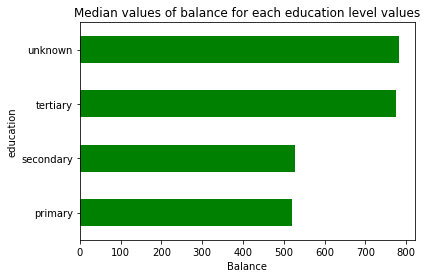

In [53]:
df.groupby(['education'])['balance'].median().plot.barh(color='green')
plt.title('Median values of balance for each education level values')
plt.xlabel('Balance')
plt.show()

- Unknown category has highest median value

## 5. Make a box plot for pdays. Do you see any outliers?

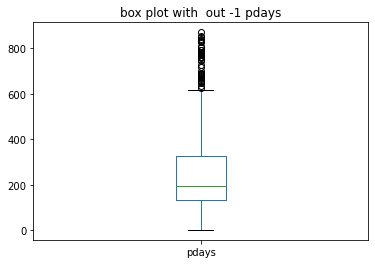

In [54]:
df.pdays.plot.box()
plt.title("box plot with  out -1 pdays")
plt.show()

so our median lies at 200, and there are some outliers after 600.

## Bivariate Analysis

### Convert the response variable to a convenient form

In [55]:
df = df.replace({'response': {"yes": 1,'no':0}})

In [56]:
all_cols = df.columns
numerical_cols = df._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

print(numerical_cols)
print(categorical_cols)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']
['poutcome', 'education', 'default', 'month', 'contact', 'housing', 'targeted', 'job', 'loan', 'marital']


## Box Plots

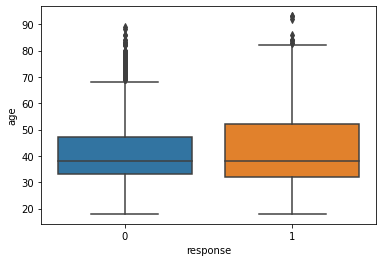

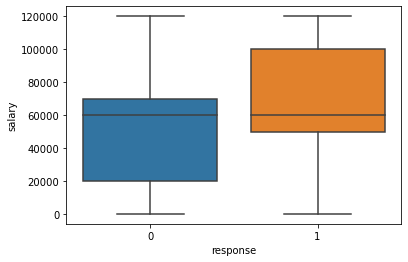

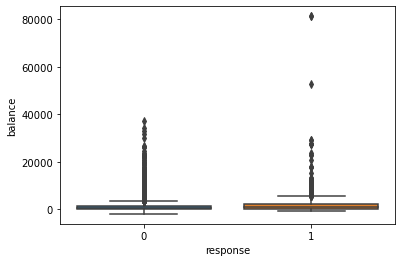

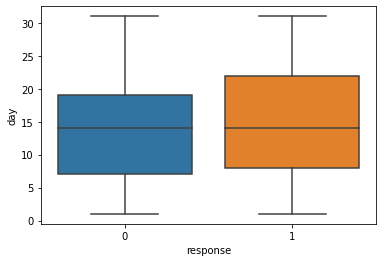

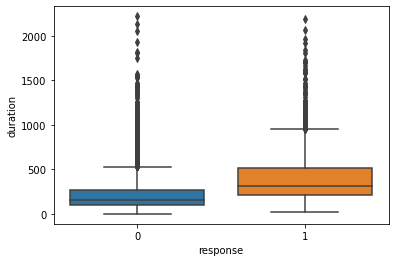

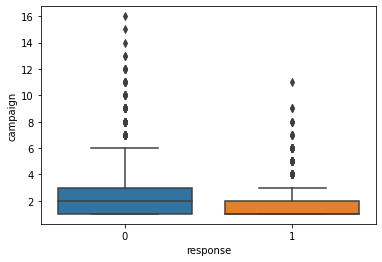

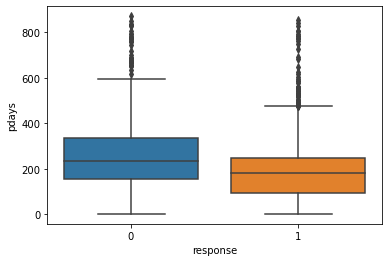

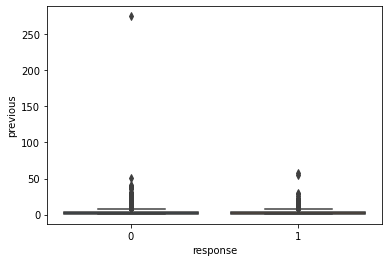

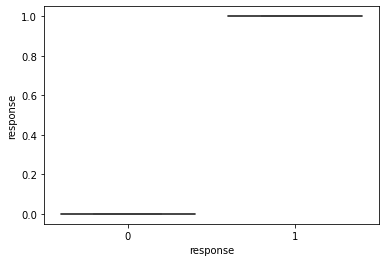

In [57]:
for i in df[numerical_cols]:
    sns.boxplot(df['response'],df[i])
    plt.show()

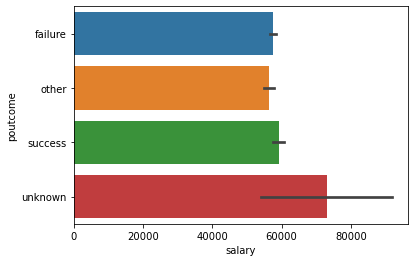

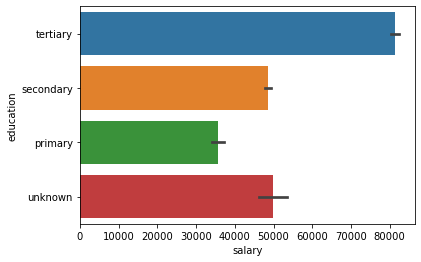

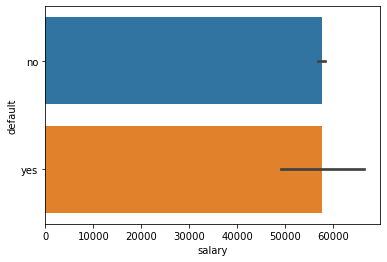

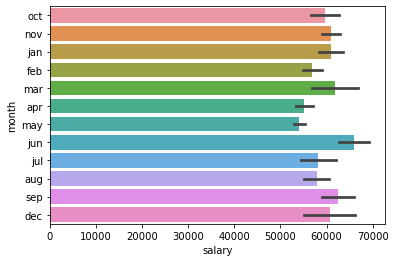

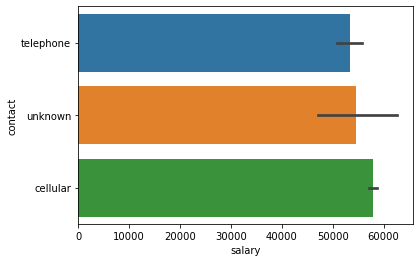

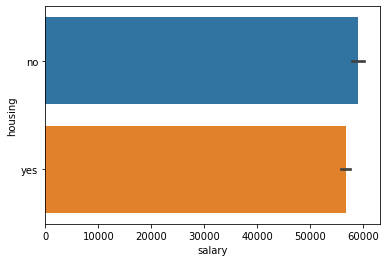

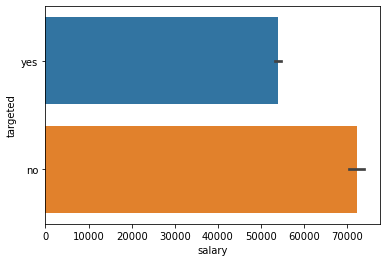

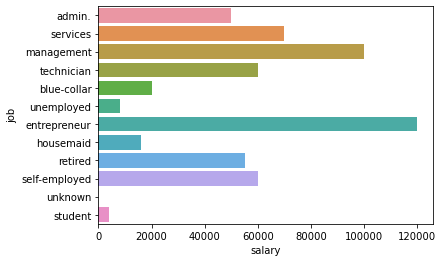

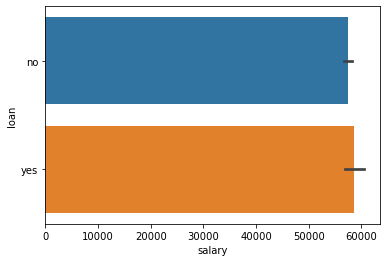

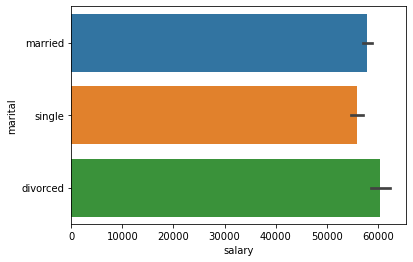

In [58]:
for i in df[categorical_cols]:
    sns.barplot(df['salary'],df[i])
    plt.show()

## 6.Are the features about the previous campaign data useful?

In [59]:
df[numerical_cols].corr()['response']

age         0.072577
salary      0.036774
balance     0.076995
day         0.029952
duration    0.342610
campaign   -0.094110
pdays      -0.152206
previous    0.008622
response    1.000000
Name: response, dtype: float64

From the above, we can observe that data variables are not highly correlated with the response variable.

## 7. Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.


yes, if the previous outcome is success there is a high chance to get successful response again, so i will use poutcome in my final model. 

if pdays = -1, it indicates that this person was not previosly contacted so we can filter out this variables as it no use for predicting target variable


## Data Preprocessing

In [60]:
df.drop(df[df['poutcome']=='unknown'].index, inplace=True)
df.drop(df[df['contact']=='unknown'].index, inplace=True)
df.drop(df[df['job']=='unknown'].index, inplace=True)

In [61]:
df.job = df.job.str.replace('admin.', 'admin') 

Convert Categorical Features into Numerical

In [63]:
df_final = df.copy(deep=True)

In [64]:
from sklearn.preprocessing import LabelEncoder
df_final[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

In [65]:
df_final.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0,1


## Train-Test Split

In [66]:
y = df_final.pop('response')
X = df_final

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=400)
X_train.shape, y_train.shape

((4889, 18), (4889,))

In [70]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4889, 18)
(4889,)
(3260, 18)
(3260,)


## Feature scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [72]:
sc.fit(X_train[numerical_cols[:-1]])

StandardScaler()

In [73]:
X_train[numerical_cols[:-1]] = sc.transform(X_train[numerical_cols[:-1]])
X_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
38929,-0.014843,0,-0.259916,0,1,1,0,0.110346,1,0,0,0.462807,8,-0.624600,-0.686187,1.043510,-0.422612,0
42982,1.455520,4,1.323073,1,1,1,0,0.167376,0,1,0,-0.546241,3,-0.537158,-0.038048,-1.169270,0.344119,2
30263,-0.620286,1,-1.209709,1,1,1,0,-0.315557,0,1,0,-1.176895,3,0.551497,-0.686187,-1.969071,-0.230929,0
24672,0.158141,7,0.373280,0,1,1,0,-0.169949,1,0,0,0.336676,9,-0.878182,1.258230,-0.929330,-0.039246,0
33405,-0.879762,1,-1.209709,2,1,1,0,-0.289772,1,1,0,0.715069,0,-0.458460,-0.686187,1.096830,-0.422612,0


In [74]:
X_test[numerical_cols[:-1]] = sc.transform(X_test[numerical_cols[:-1]])
X_test.head()

<ipython-input-74-4a6ba6aa9ea4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_cols[:-1]] = sc.transform(X_test[numerical_cols[:-1]])
C:\Users\sudha\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
25777,1.032037,9,0.060704,1,1,1,0,0.393033,1,0,0,0.593364,9,-0.557595,-0.682062,-0.864212,0.767327,0
36372,-0.360121,9,0.060704,1,0,1,0,0.026267,1,1,0,-0.415519,8,0.116361,-0.042811,1.116413,1.371778,0
38193,-0.099091,9,0.060704,1,1,1,0,-0.433686,1,1,0,0.088923,8,-1.060874,3.792697,1.134176,0.364359,0
26909,0.335958,3,-1.329885,1,2,1,0,-0.349314,0,0,0,0.845585,9,0.234522,0.596440,-0.588878,-0.441576,0
31999,-0.708160,4,1.324876,2,2,0,0,-0.426445,1,0,0,-0.163298,0,3.499270,-0.682062,-1.832320,-0.441576,0


## Predictive model 1: Logistic regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(400)

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=400)

In [113]:
clf = LogisticRegression()

In [114]:
clf.fit(X_train,y_train)

LogisticRegression()

In [115]:
cv_score= cross_val_score(clf,X_train,y_train, cv=5)
np.mean(cv_score)

0.7798757233190043

In [116]:
y_pred = clf.predict(X_test)

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1265
           1       0.56      0.22      0.31       365

    accuracy                           0.79      1630
   macro avg       0.68      0.58      0.59      1630
weighted avg       0.75      0.79      0.75      1630



In [118]:
confusion_matrix(y_test,y_pred)

array([[1201,   64],
       [ 285,   80]], dtype=int64)

In [119]:
f1_score(y_test,y_pred)

0.3143418467583497

## RFE Model

In [123]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(lr, 10)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [124]:
rfe.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True, False, False])

In [125]:
rfe = rfe.fit(X_train, y_train)
ranks = rfe.ranking_
ranks

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 9, 8, 5, 4, 1, 7, 6])

In [126]:
X_train.columns[rfe.support_]

Index(['poutcome', 'marital', 'loan', 'housing', 'job', 'education', 'contact',
       'targeted', 'default', 'campaign'],
      dtype='object')

In [128]:
cols = X_train.columns[rfe.support_]
cols

Index(['poutcome', 'marital', 'loan', 'housing', 'job', 'education', 'contact',
       'targeted', 'default', 'campaign'],
      dtype='object')

In [129]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [130]:
y_pred2 = lr.predict(X_test[cols])

In [131]:
f1_score(y_test,y_pred2)

0.5069444444444444

In [132]:
confusion_matrix(y_test,y_pred2)

array([[1200,   65],
       [ 219,  146]], dtype=int64)

## Use statsmodel

In [133]:
import statsmodels.api as sm

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
X_train.head()

,poutcome,month,marital,loan,housing,job,education,contact,targeted,default,age,salary,balance,day,duration,campaign,pdays,previous
45185,2,9,1,0,1,7,2,0,1,0,60,70000,4256,16,200,1,92,4
30212,0,3,1,0,0,9,1,0,1,0,39,60000,994,5,221,1,241,1
30637,0,3,1,0,0,4,2,0,1,0,41,100000,326,6,163,1,182,2
43044,2,3,2,0,0,10,1,0,1,0,30,8000,2424,15,337,1,95,2
44512,2,1,1,0,0,9,1,0,1,0,55,60000,10185,11,248,1,180,4


In [136]:
vif = pd.DataFrame()
vif['features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i).round(2) for i in range(X_train[cols].shape[1])]
vif = vif.sort_values(by='VIF', ascending=True)
vif

,features,VIF
8,default,1.01
6,contact,1.10
2,loan,1.19
0,poutcome,1.68
3,housing,2.70
9,campaign,2.70
4,job,2.80
7,targeted,3.58
5,education,3.72
1,marital,3.99


In [137]:
X_train_sm = sm.add_constant(X_train[cols])
X_train_sm.head()

,const,poutcome,marital,loan,housing,job,education,contact,targeted,default,campaign
45185,1.0,2,1,0,1,7,2,0,1,0,1
30212,1.0,0,1,0,0,9,1,0,1,0,1
30637,1.0,0,1,0,0,4,2,0,1,0,1
43044,1.0,2,2,0,0,10,1,0,1,0,1
44512,1.0,2,1,0,0,9,1,0,1,0,1


In [144]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

## P-value

In [138]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
a = sm.add_constant(X_train[cols])
b = y_train

In [139]:
model = sm.OLS(b, a)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     205.4
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:18:46   Log-Likelihood:                -2729.6
No. Observations:                6519   AIC:                             5481.
Df Residuals:                    6508   BIC:                             5556.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2702      0.027     10.122      0.0

In [140]:
pvals = []
for i in cols:
    a = round(results.pvalues[i],3)
    pvals.append(a)

a = zip(cols, pvals)
df_pvals = pd.DataFrame(a, columns=['Column', 'pvalues']).sort_values('pvalues')
df_pvals

,Column,pvalues
0,poutcome,0.000
2,loan,0.000
3,housing,0.000
9,campaign,0.000
5,education,0.027
7,targeted,0.113
6,contact,0.158
4,job,0.166
8,default,0.249
1,marital,0.941


In [141]:
final_features = df_pvals.nlargest(8, 'pvalues')['Column'].to_list()
final_features

['marital',
 'default',
 'job',
 'contact',
 'targeted',
 'education',
 'poutcome',
 'loan']

## Using selected features

In [146]:
clf.fit(X_train[final_features], y_train)
y_pred3 = clf.predict(X_test[final_features])

In [147]:
show_report(clf, y_pred3, y_test)

Accuracy:  0.8294478527607362
Precision:  0.4767123287671233
Recall:  0.6666666666666666

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1369
           1       0.48      0.67      0.56       261

    accuracy                           0.83      1630
   macro avg       0.70      0.76      0.73      1630
weighted avg       0.86      0.83      0.84      1630


confusion_matrix

[[1178  191]
 [  87  174]]

cross validation: [0.79509202 0.72331288 0.77852761 0.77361963 0.73296501]


In [148]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(clf)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['month', 'age', 'day', 'duration', 'pdays'], dtype='object')

So these are the most imposrtant features

## Predictive model 2: Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40,max_depth=7)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=40)

In [156]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=40)

In [157]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8466022251623201

In [158]:
y_pred_rf = clf2.predict(X_test)

In [151]:
show_report(clf2, y_pred_rf, y_test)

Accuracy:  0.839877300613497
Precision:  0.4328767123287671
Recall:  0.7452830188679245

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1418
           1       0.43      0.75      0.55       212

    accuracy                           0.84      1630
   macro avg       0.70      0.80      0.73      1630
weighted avg       0.89      0.84      0.86      1630


confusion_matrix

[[1211  207]
 [  54  158]]

cross validation: [0.77852761 0.84171779 0.85276074 0.86441718 0.60773481]


In [161]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1265
           1       0.72      0.48      0.58       365

    accuracy                           0.84      1630
   macro avg       0.79      0.71      0.74      1630
weighted avg       0.83      0.84      0.83      1630



In [162]:
f1_score(y_test,y_pred_rf)

0.5784313725490196

In [163]:
confusion_matrix(y_test,y_pred_rf)

array([[1195,   70],
       [ 188,  177]], dtype=int64)

In [165]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_rf)

0.7147977692349341

In [167]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=7, n_estimators=40),
    n_features_to_select=5)

In [169]:
rfe1.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False])

In [170]:
X_train.columns[rfe1.support_]

Index(['poutcome', 'month', 'housing', 'duration', 'pdays'], dtype='object')

In [171]:
cols = X_train.columns[rfe1.support_]

In [172]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(max_depth=7, n_estimators=40)

In [173]:
y_pred3 = rfc.predict(X_test[cols])
f1_score(y_pred3,y_test)

0.5943396226415094

In [174]:
confusion_matrix(y_pred3,y_test)

array([[1183,  176],
       [  82,  189]], dtype=int64)

['poutcome', 'duration', 'pdays', 'housing', 'month']


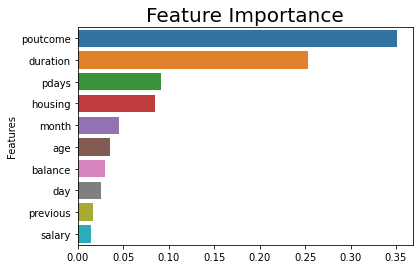

In [177]:
importances=clf2.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
selected_features = feature_importances.index.to_list()[:5]
print(selected_features)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

## Compare the performance of the Random Forest and the logistic model

In [176]:
print('Logistic Regression\n')
show_report(clf , y_pred, y_test)
print('\n')
print('='*100)
print('='*100)
print('\nRandom Forest Classifier\n')
show_report(clf2, y_pred_rf, y_test)

Logistic Regression

Accuracy:  0.7858895705521473
Precision:  0.2191780821917808
Recall:  0.5555555555555556

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      1486
           1       0.22      0.56      0.31       144

    accuracy                           0.79      1630
   macro avg       0.58      0.68      0.59      1630
weighted avg       0.88      0.79      0.82      1630


confusion_matrix

[[1201  285]
 [  64   80]]

cross validation: [0.79509202 0.72331288 0.77852761 0.77361963 0.73296501]



Random Forest Classifier

Accuracy:  0.841717791411043
Precision:  0.4849315068493151
Recall:  0.7165991902834008

Classification Report

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1383
           1       0.48      0.72      0.58       247

    accuracy                           0.84      1630
   macro avg       0.71      0.79      0.74      1630
weig

So Random Forest has less number of false negatives and slightly better accuracy.